# Tarea 1: Visión Computacional

ME4707 - Robótica - Semestre 2019-2

Profesor: Juan C. Zagal - Auxiliar: Cristián Herrera - Ayudantes: Nicolás Carvajal, Felipe Cuevas

# Instalación
## 1. Anaconda
En esta tarea, que se trabajará durante los laboratorios computacionales 1, 2 y 3, se utilizará Python y la librería de visión computacional OpenCV. La forma más fácil de tener un ambiente de desarrollo de Python con todas las bibliotecas más comunes es instalar Anaconda.

Para instalar Anaconda:
- Descargue en el siguiente link la última versión de Anaconda para Python 3: https://www.anaconda.com/distribution/
- Instale y siga las opciones default del proceso.
- Pruebe su instalación ejecutando `python` en la Terminal (`CMD` o `Anaconda Prompt`) y verificar que diga algo como `Python 3.7.3 |Anaconda 4.4.0` al principio.
- También puede seguir el sisguiente tutorial de instalación: https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444

**Nota:** Anaconda facilita mucho la instalación de las bibliotecas que usaremos en este laboratorio. Instalar las bibliotecas (OpenCV, Spyder, jupyter) desde cero puede ser un poco complicado si no estás seguro/a de lo que estás haciendo. Por lo tanto, instalar Anaconda es altamente recomendado para estas sesiones de laboratorio.

## 2. Jupyter
**Jupyter notebook** es una aplicación Web que permite crear documentos con código Python (como este documento). Para el desarrollo de esta tarea es recomendable utilizar Spyder, aunque también es perfectamente realizable en Jupyter si así lo prefiere. A la hora de armar su informe de entrega puede utilizar este mismo archivo como base para completar sus respuestas.

Para ello descargue desde u-cursos la versión `.ipynb` de este documento. Luego, para cargarlo, ejecute `jupyter notebook` en el `Anaconda Prompt`, ubique el archivo en los directorios y seleccionelo.

**TIP:** con Shift-Enter puedes ejecutar cada bloque/celda del notebook.

## 3. Google Colab
Si prefiere no instalar Anaconda en su computador, puede utilizar **Google Colab**. Colaboratory es un entorno Jupyter notebook gratuito que se ejecuta completamente en la nube. Puede escribir y ejecutar código, solo requiere de una cuenta google.

https://colab.research.google.com/notebooks/welcome.ipynb

## 4. OpenCV
En esta tarea se utilizará principalmente **OpenCV** (Open Source Computer Vision Library: https://docs.opencv.org/2.4.13.7/ ), una librería que contiene cientos de algoritmos de visión computacional.

Para instalar OpenCV:
- Abra la `Terminal` o `Anaconda Prompt` y ejecute: 

`python -m pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10`

Para comprobar que se ha instalado correctamente la librería, haga click en el siguiente bloque de código, y ejecútelo presionando Shift+Enter:

In [6]:
# instalar versión 3.3.0.10 de OpenCV
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

import cv2
print('Si se muestra esto es porque ya está instalado!')

Si se muestra esto es porque ya está instalado!


In [8]:
# agregar imágenes al entorno de google colab
!git clone https://github.com/cristianherrera-uchile/robotica-ME4707.git

import os
os.chdir('robotica-ME4707')
# ahora la carpeta robotica-ME4707 es el directorio actual

fatal: destination path 'robotica-ME4707' already exists and is not an empty directory.


# Problema
La empresa de manufactura NERV S.A, dedicada al mecanizado y corte de piezas metálicas, ha decidido automatizar su sistema de control de calidad con el fin de acelerar la producción y reducir el número de piezas defectuosas en la línea de ensamblaje. Por esta razón, se le ha encargado a usted desarrollar un sistema de visión computacional que permita identificar aquellas piezas cuyas medidas escapen de las tolerancias especificadas.

La pieza que actualmente se encuentra en producción corresponde a la pieza en aluminio mostrada en la imagen `part_ref.png`.

Para leer y mostrar imágenes:

(-0.5, 1116.5, 837.5, -0.5)

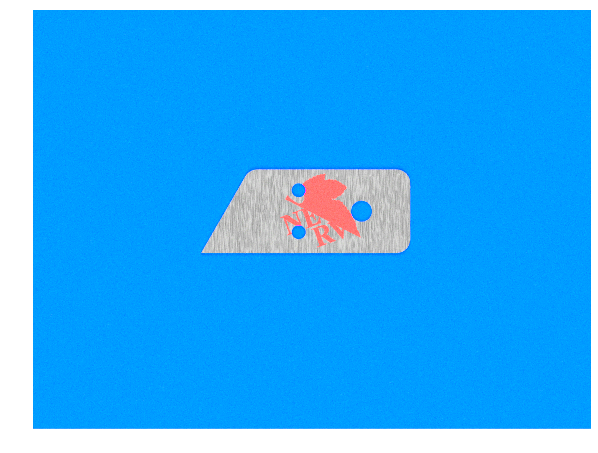

In [10]:
from matplotlib import pyplot as plt
import numpy as np

# leer imagen
img = cv2.imread('images/part_ref.png')

# transformar a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

Durante la inspección de calidad solo se ha de revisar:
- **El ángulo del corte oblicuo de la izquierda.**
- **La posición de las dos perforaciones de la izquiera respecto a la perforación de la derecha.**

Las especificaciones de estas medidas se presentan en la imagen `part_spec.png`. Notar que las tolerancias se presentan en **porcentajes**.

## Parte 1
Dado que en la línea de ensamblaje vienen muchas piezas juntas, es necesario segmentar y etiquetar cada una de éstas para luego aislarlas y procesarlas individualmente. Esto se conoce como `masking`.

Considerando la imagen `batch_1.png`, escriba el código necesario para cumplir lo anterior. En particular, se espera que el resultado de este proceso sea una matriz `labels` (`numpy.array`), de las mismas dimensiones de la imagen, que contenga las etiquetas de cada uno de los pixeles en la imagen. Así, al escribir:

`part_1 = np.uint8( (labels==1)*255 )`

`plt.imshow(part_1, cmap='gray')`

Se obtiene la imagen `result_part_1.png`.

**TIP:** Para binarizar o segmentar una imagen puede serle útil analizar el histograma de intensidades en la imagen con `np.histogram`.

In [0]:
## RESPUESTA PARTE 1










part_1 = np.uint8( (labels==1)*255 )

# visualizar
fig = plt.figure(figsize=(15, 15))
plt.imshow(part_1, cmap='gray')
plt.axis('off')

## Parte 2
Habiendo identificado cada una de las piezas mediante una etiqueta, ahora es posible procesarlas por separado.

En primer lugar, procese la imagen tal de obtener los bordes de la pieza como en la imagen a continuación. Pruebe con los algoritmos de detección de bordes `Sobel` y `cv2.Canny`, y comente cúal de estos funciona mejor.

**TIP:** Para realizar una convolución sobre una imagen, puede utilizar la función `cv2.filter2D`.

In [0]:
## RESPUESTA PARTE 2

# Sobel







fig = plt.figure(figsize=(15, 15))
plt.imshow(edge_sobel, cmap='gray')
plt.axis('off')

# Canny







fig = plt.figure(figsize=(15, 15))
plt.imshow(edge_canny, cmap='gray')
plt.axis('off')

## Parte 3.1
Con los bordes de la pieza aislados, se pueden aplicar las transformadas de Hough para reconocimiento geométrico. Implemente la transformada de Hough de rectas (`myHough(part_edges)`) para obtener el ángulo de corte de la pieza.

In [0]:
## RESPUESTA PARTE 3.1

def myHough(part_edges):
    """
    -> float
    
    Obtiene el ángulo de corte de la pieza a partir de los bordes de esta.
    
    :param np.array part_edges:
        imagen binaria que contiene los bordes de la pieza a analizar.
    
    :returns:
        ángulo de corte izquierdo.
    """
    
    
    
    
    
# probar función
cut_angle = myHough(edge_canny)

## Parte 3.2

OpenCV también contiene implementaciones de las transformadas de Hough: `cv2.HoughLines` y `cv2.HoughCircles`. Utilizando estos algoritmos, obtenga el ángulo del corte izquierdo y las posiciones de las tres perforaciones. Puede usar `result_part_3.png` como referencia.

In [0]:
## RESPUESTA PARTE 3.2

# transformada hough rectas









# transformada hough circulos









## Parte 4
Ahora que ha logrado obtener las medidas de una pieza, repita el proceso anterior con la imagen `part_ref.png` para obtener las medidas de referencia. Luego, implemente la función `detect_faulty_parts(img)` que, tomando como input una imagen como `batch_1.png`, detecte las piezas defectuosas en la imagen y ponga una máscara roja sobre éstas como en la imagen a continuación (`result_part_4.png`).

In [0]:
## RESPUESTA PARTE 4

def detect_faulty_parts(img):
    """
    -> Image (np.array)
    Detecta en la imagen aquellas piezas que no cumplan con las especificaciones de diseño.
    
    :param np.array img:
        imagen en RGB que contiene las piezas a analizar.
    
    :returns:
        imagen con las piezas defectuosas identificadas con rojo.
    """

    
    
    
    
    
    
    
    

    
    
    
    
    
    
    


# probar la función
test_batch = cv2.imread('images/batch_1.png')
test_batch = cv2.cvtColor(test_batch, cv2.COLOR_BGR2RGB)
ret = detect_faulty_parts(test_batch)

fig = plt.figure(figsize=(10, 10))
plt.imshow(ret)
plt.axis('off')

## Parte 5
Dado el buen funcionamiento de su sistema, la gerencia ha decidido combinar la línea de ensamblaje actual con la del nuevo modelo. Estas últimas presentan el nuevo logo de la empresa y siguen especificaciones distintas a la del antiguo modelo.

Utilizando SIFT (`cv2.xfeatures2d.SIFT_create`), modifique la función `detect_faulty_parts(img)` tal que se detecte el modelo de cada pieza y se analicen únicamente las del modelo antiguo.

In [0]:
## RESPUESTA PARTE 5

def detect_faulty_parts_2(img):
    """
    -> Image (np.array)
    Detecta en la imagen aquellas piezas que no cumplan con las especificaciones de diseño.
    
    :param np.array img:
        imagen en RGB que contiene las piezas a analizar.
    
    :returns:
        imagen con las piezas defectuosas identificadas con rojo.
    """

    
    
    
    
    
    
    
    
    
    
    
    



# probar la función
test_batch = cv2.imread('images/batch_2.png')
test_batch = cv2.cvtColor(test_batch, cv2.COLOR_BGR2RGB)
ret = detect_faulty_parts_2(test_batch)

fig = plt.figure(figsize=(10, 10))
plt.imshow(ret)
plt.axis('off')